<a href="https://colab.research.google.com/github/romanzelararg/GRUPO-11---Proyecto-Final-Cohorte-2022-/blob/main/Copia_de_ISPC_Piletas_Deteccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Iniciando....")

Iniciando....


In [ ]:
%%sh
rm -rf raster-vision/
git clone https://github.com/azavea/raster-vision.git

Cloning into 'raster-vision'...


In [ ]:
!pip install raster-vision/rastervision_pipeline/
!pip install raster-vision/rastervision_core/
!pip install raster-vision/rastervision_pytorch_learner/
!pip install raster-vision/rastervision_aws_s3/
!pip install raster-vision/rastervision_pytorch_backend/

!pip install gdown

Processing ./raster-vision/rastervision_pipeline
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.0 MB/s eta 0:00:00
  Created wheel for rastervision-pipeline: filename=rastervision_pipeline-0.30.2.dev0-py3-none-any.whl size=37074 sha256=224eeebd14655931751554850a109606bc6795a0015cbd4165dff99d3f70ddb3
  Stored in directory: /tmp/pip-ephem-wheel-cache-sfmx0neq/wheels/a2/b0/40/6e81e96fd508b92025df1bc01df0429c6c12379fa7c7c3306e
Successfully built rastervision-pipeline
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.7.1
    Uninstalling pydantic-2.7.1:
      Successfully uninstalled pydantic-2.7.1
Processing ./raster-vision/rastervision_core
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.9/182.9 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 18.9 MB

In [ ]:
!sudo apt-get install gdal-bin

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gdal-bin is already the newest version (3.6.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os.path import join
from subprocess import check_output

# Establece la variable de entorno 'GDAL_DATA' para especificar la ubicación de los datos de GDAL.
# GDAL es una biblioteca para leer y escribir formatos de datos geoespaciales.
# 'check_output' ejecuta un comando en la shell y devuelve su salida.
os.environ['GDAL_DATA'] = check_output('pip show rasterio | grep Location | awk \'{print $NF"/rasterio/gdal_data/"}\'', shell=True).decode().strip()

# Establece la variable de entorno 'AWS_NO_SIGN_REQUEST' para permitir el acceso no autenticado a los datos de AWS S3.
os.environ['AWS_NO_SIGN_REQUEST'] = 'YES'

import glob
from pathlib import Path

import gc
# Importa el módulo de recolección de basura de Python.

import torch
# Importa PyTorch, una biblioteca de aprendizaje profundo.

# Importa clases de Raster Vision para la configuración de clases y etiquetas de segmentación semántica.
from rastervision.core.data import ClassConfig
from rastervision.core.data import SemanticSegmentationLabels, SemanticSegmentationDiscreteLabels

# Importa clases de Raster Vision para trabajar con fuentes de datos ráster y transformadores.
from rastervision.core.data import RasterioSource, MinMaxTransformer

# Importa configuraciones para el almacenamiento de etiquetas de segmentación semántica.
from rastervision.core.data.label_store.semantic_segmentation_label_store_config import PolygonVectorOutputConfig

# Importa clases de Raster Vision para el aprendizaje y configuración de segmentación semántica.
from rastervision.pytorch_learner import SemanticSegmentationLearner
from rastervision.pytorch_learner import SolverConfig
from rastervision.pytorch_learner import SemanticSegmentationLearnerConfig
from rastervision.pytorch_learner import SemanticSegmentationSlidingWindowGeoDataset
from rastervision.pytorch_learner import SemanticSegmentationGeoDataConfig

import subprocess
# Importa el módulo para ejecutar comandos del sistema operativo.
from osgeo import gdal
# Importa la biblioteca GDAL para trabajar con datos geoespaciales.
import sys # Importa el módulo sys que proporciona acceso a algunas variables y funciones que interactúan con el intérprete de Python.

"""
En resumen, este código prepara el entorno para trabajar con datos geoespaciales, define las clases y etiquetas para la segmentación semántica,
y configura el aprendizaje y la validación de un modelo de aprendizaje profundo utilizando Raster Vision y PyTorch.
Además, se asegura de que los datos necesarios de GDAL estén disponibles y permite el acceso a los datos almacenados en AWS S3 sin necesidad de autenticación.
"""


In [ ]:
import gdown
# Importa la biblioteca gdown, que permite descargar archivos desde Google Drive.

# Define la ruta del directorio donde se guardará el modelo entrenado.
model_folder = "/content/drive/MyDrive/Deteccion/modelo_entrenado/"
# Crea el directorio si no existe. El signo '!' indica que se ejecuta un comando del sistema operativo en el entorno de Jupyter Notebook o Google Colab.
!mkdir -p $model_folder

# URL del archivo en Google Drive que se desea descargar.
model_url = "https://drive.google.com/file/d/1-ii4Lk1wjBMsvZYgiWtb-wxhEErpzG35/view?usp=drive_link"
# Ruta completa donde se guardará el archivo descargado, incluyendo el nombre del archivo.
model_path = model_folder + "model-bundle.zip"

# Utiliza gdown para descargar el archivo desde la URL especificada y guardarlo en la ruta indicada.
# El argumento 'fuzzy=True' permite cierta flexibilidad en caso de que la URL no sea exacta.
gdown.download(model_url, model_path, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1-ii4Lk1wjBMsvZYgiWtb-wxhEErpzG35
From (redirected): https://drive.google.com/uc?id=1-ii4Lk1wjBMsvZYgiWtb-wxhEErpzG35&confirm=t&uuid=2a791b85-6480-45f9-9c2e-d1a4a797f256
To: /content/drive/MyDrive/Deteccion/modelo_entrenado/model-bundle.zip
100%|██████████| 93.2M/93.2M [00:01<00:00, 48.7MB/s]


'/content/drive/MyDrive/Deteccion/modelo_entrenado/model-bundle.zip'

In [ ]:
# Configuración de las clases para la segmentación semántica.
class_config = ClassConfig(
    names=['background', 'pileta'],
    # Nombres de las clases: 'background' y 'pileta'.
    colors=['lightgray', 'darkred'],
    # Colores asociados a cada clase para la visualización.
    null_class='background')
 # Clase nula o de fondo.
class_config.ensure_null_class()
# Asegura que haya una clase nula definida.

# Tamaño de las ventanas de entrada para el modelo
window_size = 250

#Carga de un modelo preentrenado de PyTorch usando torch.hub.
model = torch.hub.load(
    'AdeelH/pytorch-fpn:0.3',
    # Repositorio y versión del modelo en GitHub.
    'make_fpn_resnet',
    # Función para crear un modelo FPN basado en ResNet.
    name='resnet18',
    # Nombre del modelo ResNet a utilizar.
    fpn_type='panoptic',
    # Tipo de FPN para segmentación panóptica.
    num_classes=len(class_config),
    # Número de clases definidas en class_config.
    fpn_channels=128,
    # Número de canales en la FPN.
    in_channels=3,
    # Número de canales de entrada (imágenes RGB).
    out_size=(window_size, window_size),
    # Tamaño de salida del modelo.
    pretrained=True)
# Indica si el modelo está preentrenado.

# Creación de un aprendiz de segmentación semántica a partir de un paquete de modelo.
learner = SemanticSegmentationLearner.from_model_bundle(model_bundle_uri=model_path, # URI del paquete de modelo.
                                                        model=model, # Modelo de red neuronal cargado.
                                                        output_dir=model_folder, # Directorio de salida para guardar los resultados.
                                                        training=False) # Indica si el aprendiz se utilizará para entrenamiento.

"""
Este código es típico en un flujo de trabajo de visión por computadora donde se necesita cargar un modelo entrenado
para realizar tareas de segmentación en nuevas imágenes.
La segmentación semántica es un proceso clave en la interpretación automática de imágenes geoespaciales, como las imágenes de satélite,
para aplicaciones como la cartografía, la monitorización del uso del suelo y la gestión de recursos naturales.
"""


Downloading: "https://github.com/AdeelH/pytorch-fpn/zipball/0.3" to /root/.cache/torch/hub/0.3.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 236MB/s]
2024-05-19 13:26:19:rastervision.pytorch_learner.learner: INFO - Loading learner from bundle /content/drive/MyDrive/Deteccion/modelo_entrenado/model-bundle.zip.
INFO:rastervision.pytorch_learner.learner:Loading learner from bundle /content/drive/MyDrive/Deteccion/modelo_entrenado/model-bundle.zip.
2024-05-19 13:26:19:rastervision.pytorch_learner.learner: INFO - Unzipping model-bundle to /opt/data/tmp/tmpyorjfrc_/model-bundle
INFO:rastervision.pytorch_learner.learner:Unzipping model-bundle to /opt/data/tmp/tmpyorjfrc_/model-bundle
2024-05-19 13:26:20:rastervision.pytorch_learner.learner: INFO - Loading model weights from: /opt/data/tmp/tmpyorjfrc_/model-bundle/model.pth
INFO:rastervision.pytorch_learner.lear

imagen

In [ ]:
image_file_dest = "/content/drive/MyDrive/Deteccion/img_SAS_wgs.tif"

In [ ]:
# Creación de un conjunto de datos de predicción utilizando un enfoque de ventana deslizante.
pred_ds = SemanticSegmentationSlidingWindowGeoDataset.from_uris(
      class_config=class_config, # Configuración de las clases para la segmentación.
      image_uri=image_file_dest, # URI de la imagen de entrada.
      image_raster_source_kw=dict(allow_streaming=True), # Permite la transmisión de datos de la imagen.
      #aoi_uri=aoi_uri,  # URI del Área de Interés, comentado y no utilizado en este caso.
      #aoi_uri=aoi_uri,
      size=window_size, # Tamaño de las ventanas de predicción.
      stride=window_size) # Distancia entre ventanas consecutivas.

# Realización de predicciones en el conjunto de datos de predicción
predictions = learner.predict_dataset(
      pred_ds, # Conjunto de datos de predicción.
      raw_out=True, # Devuelve las salidas crudas del modelo.
      numpy_out=True, # Devuelve las predicciones como arrays de NumPy.
      predict_kw=dict(out_shape=(window_size, window_size)),  # Forma de salida de las predicciones.
      progress_bar=True) # Muestra una barra de progreso durante la predicción.

# Creación de etiquetas de segmentación semántica a partir de las predicciones.
pred_labels = SemanticSegmentationLabels.from_predictions(
        pred_ds.windows, # Ventanas del conjunto de datos de predicción.
        predictions, # Predicciones realizadas por el modelo.
        smooth=True, # Aplica suavizado a las predicciones.
        extent=pred_ds.scene.extent, # Extensión de la escena del conjunto de datos.
        num_classes=len(class_config))       # Número de clases definidas en la configuración.

"""
Este proceso es típico en aplicaciones de visión por computadora donde se necesita interpretar y clasificar el contenido de imágenes grandes,
como las imágenes de satélite, en categorías significativas para análisis posteriores o toma de decisiones basada en datos geoespaciales.
"""


Predicting:   0%|          | 0/1647 [00:00<?, ?it/s]

In [ ]:
def generate_prediction_polygons(image_file_dest, class_config, learner, save_dir):
    # Crea una fuente de datos ráster a partir de la imagen de entrada y aplica una transformación mín-máx.
  img_raster_source = RasterioSource(image_file_dest, allow_streaming=True, raster_transformers=[MinMaxTransformer()])

    # Guardar predicciones
    # Guarda las etiquetas de predicción en el directorio especificado.
  pred_labels.save(
      uri=save_dir,
      crs_transformer= img_raster_source.crs_transformer,  # Transformador de sistema de coordenadas.
      class_config=class_config,
      # Configuración de las clases.
      # set to False to skip writing `labels.tif`
      discrete_output=False, # No guarda la imagen de etiquetas discretas.
      # set to False to skip writing `scores.tif`
      smooth_output=False, # No guarda la imagen de puntuaciones suavizadas.
      # set to True to quantize floating point score values to uint8 in scores.tif to reduce file size
      smooth_as_uint8=True,  # Cuantifica las puntuaciones flotantes a uint8 para reducir el tamaño del archivo.
      # vector outputs are now always written to <pred root URI>/vector_outputs/class-<i>-<class name>.json
      vector_outputs=[PolygonVectorOutputConfig(class_id=1)] # Configuración de salida de polígonos vectoriales.
      )

  # Renombra el archivo JSON con los polígonos de predicción para la clase 'pileta'.
    # renombramos el archivo con la predicción
  !mv {save_dir + "vector_output/class-1-pileta.json"} {save_dir + "vector_output/" + Path(raster_file).stem + "_prediction.json"}

In [ ]:
save_dir = "/tmp/predicciones/"
!mkdir -p $save_dir

generate_prediction_polygons(image_file_dest, class_config, learner, save_dir)

2024-05-19 13:34:28:rastervision.core.data.label_store.semantic_segmentation_label_store: INFO - Writing vector outputs to disk.
INFO:rastervision.core.data.label_store.semantic_segmentation_label_store:Writing vector outputs to disk.


Vectorizing predictions:   0%|          | 0/1 [00:00<?, ?it/s]

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `mv {save_dir + "vector_output/class-1-pileta.json"} {save_dir + "vector_output/" + Path(raster_file).stem + "_prediction.json"}'


In [ ]:
#SE GUARDAN LOS RESULTADOS EN LA CARPETA DRIVE

# Define la ruta de destino en Google Drive donde se guardarán las predicciones.
predictions_dest = '/content/drive/My Drive/Deteccion/predicciones/'

# Importa la biblioteca geopandas, que es útil para trabajar con datos geoespaciales.
import geopandas as gpd

# Utiliza la función glob para encontrar todos los archivos JSON en el directorio de salida de predicciones.
partial_results = glob.glob(save_dir + "vector_output/*.json")

# Crea un GeoDataFrame vacío, que es una estructura de datos especializada de geopandas para manejar datos geoespaciales.
results = gpd.GeoDataFrame()

# Itera sobre cada archivo JSON encontrado y los concatena en el GeoDataFrame 'results'.
for file in partial_results:
    results = gpd.GeoDataFrame(gpd.pd.concat([results, gpd.read_file(file)]))

# Guarda el GeoDataFrame 'results' como un archivo GeoJSON en la ruta especificada en Google Drive.
results.to_file(predictions_dest + "predicciones.geojson", driver="GeoJSON")

In [ ]:
pred_labels.save(
    uri= '/content/drive/My Drive/Deteccion/predicciones/', # La ruta donde se guardarán las etiquetas de predicción.
    crs_transformer=pred_ds.scene.raster_source.crs_transformer, # El transformador de sistema de coordenadas (CRS) para convertir
                                                                 # las coordenadas de píxeles a coordenadas geográficas.
    class_config=class_config) # La configuración de las clases utilizadas para la segmentación.

Saving pixel labels:   0%|          | 0/14 [00:00<?, ?it/s]

Saving pixel scores:   0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
# Obtiene un arreglo de puntuaciones para las predicciones dentro de la extensión de las etiquetas.
scores = pred_labels.get_score_arr(pred_labels.extent)

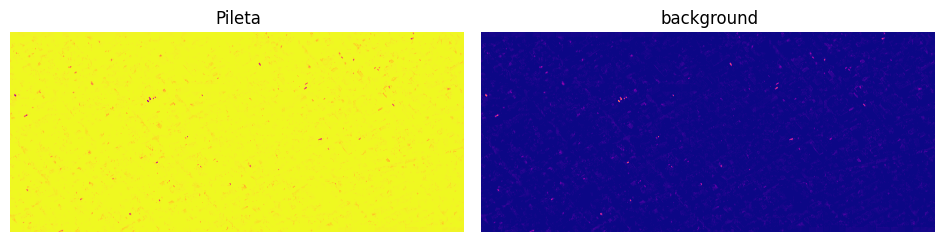

In [ ]:
# Se utiliza la biblioteca matplotlib para visualizar las puntuaciones de predicción de un modelo de segmentación semántica.
from matplotlib import pyplot as plt

# Se asume que 'scores' es un arreglo que contiene las puntuaciones de predicción para dos clases: 'pileta' y 'background'.
scores_building = scores[0] # Puntuaciones de la clase 'pileta'
scores_background = scores[1] # Puntuaciones de la clase 'background'.

# Se crea una figura con dos subgráficos (ax1 y ax2) dispuestos horizontalmente.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(w_pad=-2) # Ajusta el diseño de la figura para que haya un espacio entre los subgráficos.

# Visualiza las puntuaciones de la clase 'pileta' en el primer subgráfico.
ax1.imshow(scores_building, cmap='plasma') # Usa el mapa de colores 'plasma'.
ax1.axis('off')  # Oculta los ejes.
ax1.set_title('Pileta') # Establece el título del subgráfico.

# Visualiza las puntuaciones de la clase 'background' en el segundo subgráfico.
ax2.imshow(scores_background, cmap='plasma')
ax2.axis('off')
ax2.set_title('background')
plt.show() # Muestra la figura con los subgráficos.

"""
Este tipo de visualización es útil para analizar las áreas de una imagen donde el modelo tiene una alta confianza en sus predicciones para cada clase.
Permite a los usuarios o analistas entender mejor cómo el modelo está interpretando diferentes partes de la imagen.
"""


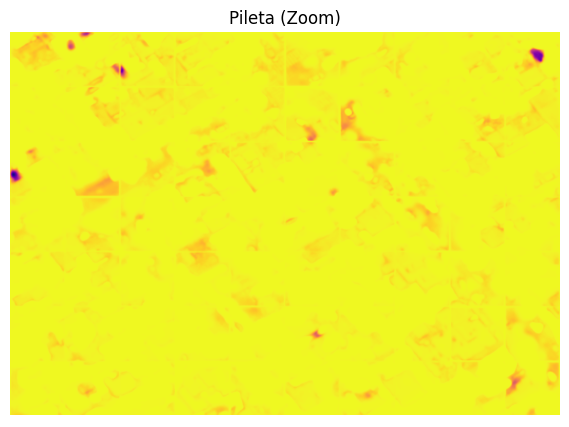

In [ ]:
# PROBABILIDADES DE PILETAS


from matplotlib import pyplot as plt

# 'scores' es un arreglo que contiene las puntuaciones de predicción para las clases.
# Aquí se selecciona el arreglo de puntuaciones para la clase 'pileta'.
scores_building = scores[0]

# Se definen las coordenadas para el recorte de la imagen de puntuaciones.
# Definir las coordenadas del recorte (xmin, xmax, ymin, ymax)
xmin, xmax, ymin, ymax = 5000, 7500, 5000, 7500

# Se realiza el recorte de la matriz de puntuaciones según las coordenadas definidas.
# Recortar la matriz
zoomed_scores_building = scores_building[ymin:ymax, xmin:xmax]

# Se crea una figura y un eje para la visualización con un tamaño de 10x5 pulgadas.
fig, ax = plt.subplots(figsize=(10, 5))

# Se muestra el recorte de las puntuaciones en el eje utilizando un mapa de colores 'plasma'.
ax.imshow(zoomed_scores_building, cmap='plasma')

# Se desactivan los ejes para una visualización más limpia.
ax.axis('off')

# Se establece el título del gráfico como 'Pileta (Zoom)'.
ax.set_title('Pileta (Zoom)')

# Se muestra la figura con el gráfico.
plt.show()

"""
Este tipo de visualización es útil para examinar en detalle las áreas donde el modelo ha predicho la presencia de ‘piletas’ con una cierta confianza,
representada por las puntuaciones en el arreglo scores.
"""


EVALUACION


In [ ]:
from rastervision.core.data.utils import make_ss_scene

# Crea una escena de segmentación semántica utilizando la configuración de clases y las URIs de las imágenes y anotaciones.
scene = make_ss_scene(
    class_config=class_config, # Configuración de las clases para la segmentación.
    image_uri= "/content/drive/MyDrive/Deteccion/img_SAS_wgs.tif", # URI de la imagen de entrada.
    label_vector_uri= "/content/drive/MyDrive/Deteccion/anotaciones/anotaciones_wgs_geoj_r2.geojson", # URI del archivo GeoJSON con las anotaciones vectoriales.
    label_vector_default_class_id=class_config.get_class_id('pileta'),  # ID de la clase por defecto para las anotaciones vectoriales.
    label_raster_source_kw=dict(
        background_class_id=class_config.get_class_id('background')), # ID de la clase de fondo para el raster de etiquetas.
    image_raster_source_kw=dict(allow_streaming=True)) # Permite la transmisión de datos de la imagen.

# Obtiene las etiquetas de verdad de campo de la fuente de etiquetas de la escena.
gt_labels = scene.label_source.get_labels()



In [ ]:
from rastervision.core.evaluation import SemanticSegmentationEvaluator

# Se crea una instancia del evaluador de segmentación semántica utilizando la configuración de clases.
evaluator = SemanticSegmentationEvaluator(class_config)

# Se evalúan las predicciones del modelo utilizando las etiquetas de verdad de campo y las predicciones generadas.
evaluation = evaluator.evaluate_predictions(
    ground_truth=gt_labels, # Etiquetas de verdad de campo.
    predictions=pred_labels) # Etiquetas de predicción generadas por el modelo.

""" El objeto evaluation resultante contendrá las métricas de evaluación que proporcionan una visión cuantitativa del rendimiento del modelo.
Estas métricas son cruciales para entender cómo el modelo está funcionando y para identificar áreas donde podría necesitar mejoras.
"""


Computing metrics: 100%|##########| 1/1 [00:28<00:00, 28.64s/it]

In [ ]:
# Accede a los resultados de evaluación para la clase con ID 0, que generalmente corresponde a la clase 'background'.
evaluation.class_to_eval_item[0]

"""
El objeto eval_item resultante contendrá varias métricas como precisión, recall, F1-score, entre otras,
que son útiles para entender cómo el modelo ha realizado las predicciones para esa clase en particular.
Estas métricas ayudan a evaluar la calidad del modelo y a identificar posibles áreas de mejora.
"""


{'class_id': 0,
 'class_name': 'background',
 'conf_mat': [[364.0, 93874.0], [0.0, 103510288.0]],
 'conf_mat_dict': {'FN': 0.0, 'FP': 93874.0, 'TN': 364.0, 'TP': 103510288.0},
 'conf_mat_frac': [[3.513360024445264e-06, 0.0009060801069636668],
                   [0.0, 0.9990904065330118]],
 'conf_mat_frac_dict': {'FN': 0.0,
                        'FP': 0.0009060801069636668,
                        'TN': 3.513360024445264e-06,
                        'TP': 0.9990904065330118},
 'count_error': 93874.0,
 'gt_count': 103510288.0,
 'metrics': {'f1': 0.99954675301506,
             'precision': 0.9990939167096395,
             'recall': 1.0,
             'sensitivity': 1.0,
             'specificity': 0.0038625607504403745},
 'pred_count': 103604162.0,
 'relative_frequency': 0.9990904065330118}

In [ ]:
# Accede a los resultados de evaluación para la clase con ID 1.
evaluation.class_to_eval_item[1]

{'class_id': 1,
 'class_name': 'pileta',
 'conf_mat': [[103510288.0, 0.0], [93874.0, 364.0]],
 'conf_mat_dict': {'FN': 93874.0, 'FP': 0.0, 'TN': 103510288.0, 'TP': 364.0},
 'conf_mat_frac': [[0.9990904065330118, 0.0],
                   [0.0009060801069636668, 3.513360024445264e-06]],
 'conf_mat_frac_dict': {'FN': 0.0009060801069636668,
                        'FP': 0.0,
                        'TN': 0.9990904065330118,
                        'TP': 3.513360024445264e-06},
 'count_error': 93874.0,
 'gt_count': 94238.0,
 'metrics': {'f1': 0.007695397560305279,
             'precision': 1.0,
             'recall': 0.0038625607504403745,
             'sensitivity': 0.0038625607504403745,
             'specificity': 1.0},
 'pred_count': 364.0,
 'relative_frequency': 0.0009095934669881121}